### https://github.com/dheerajvarma24/Lecture_Covid_19_data_analysis/blob/master/notebooks/Data_Preparation_V1.1.ipynb

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pd.set_option('display.max_rows', 500)

In [3]:
data_path = '../data/raw/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data_df = pd.read_csv(data_path)
raw_data_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
dates_col = raw_data_df.columns[4:]

In [5]:
len(raw_data_df['Country/Region'].unique())

199

In [6]:
temp = []
for each in dates_col:
    temp.append(each)

dates_df = pd.DataFrame(temp)
dates_df.head()

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
dates_df = dates_df.rename(columns={0 : 'date'})

In [8]:
len(dates_df)

880

In [9]:
raw_data_df[raw_data_df['Country/Region'] == "US"].iloc[:,4:].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
6/15/22    85941290
6/16/22    86057735
6/17/22    86216418
6/18/22    86230982
6/19/22    86246101
Length: 880, dtype: int64

In [10]:
dates_df['US'] = np.array(raw_data_df[raw_data_df['Country/Region'] == "US"].iloc[:,4:].sum(axis=0))
dates_df.tail()

,date,US
875,6/15/22,85941290
876,6/16/22,86057735
877,6/17/22,86216418
878,6/18/22,86230982
879,6/19/22,86246101


In [11]:
 countries_list = ['India', 'Germany', 'Italy', 'Australia']
for each in countries_list:
    dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))

    

In [12]:
dates_df.tail()

,date,US,India,Germany,Italy,Australia
875,6/15/22,85941290,43257730,27096571,17736696,7724035
876,6/16/22,86057735,43270577,27124689,17773764,7753800
877,6/17/22,86216418,43283793,27204953,17809934,7778643
878,6/18/22,86230982,43296692,27204955,17844905,7801241
879,6/19/22,86246101,43309473,27211896,17879160,7825659


## slice, adding a column to DataFrame, columns(), unique(), len(..), sum(axis=0), iloc(:,3:), 

<AxesSubplot:xlabel='date'>

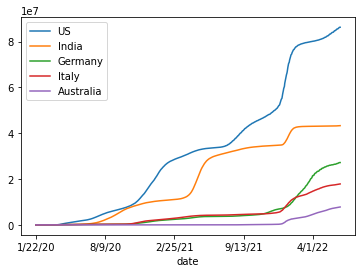

In [19]:
%matplotlib inline
dates_df.set_index('date').plot()

## converting date string to datetime then to iso format

In [20]:
type(dates_df['date'][0])

str

In [22]:
(dates_df['date'][0])

'1/22/20'

In [21]:
from datetime import datetime

In [26]:
x= datetime.strptime(dates_df['date'][0], '%m/%d/%y')
print(x)
print(type (x))

2020-01-22 00:00:00
<class 'datetime.datetime'>


In [28]:
y = datetime.strftime(x, '%Y-%m-%d')
print(y)

2020-01-22


In [37]:
temp_datetime = [datetime.strptime(each, '%m/%d/%y') for each in dates_df['date']]
temp_isoDates = [datetime.strftime(each, '%Y-%m-%d') for each in temp_datetime]

temp_isoDates[0]

'2020-01-22'

In [38]:
dates_df['date'] = temp_isoDates

In [39]:
dates_df.tail()

,date,US,India,Germany,Italy,Australia
875,2022-06-15,85941290,43257730,27096571,17736696,7724035
876,2022-06-16,86057735,43270577,27124689,17773764,7753800
877,2022-06-17,86216418,43283793,27204953,17809934,7778643
878,2022-06-18,86230982,43296692,27204955,17844905,7801241
879,2022-06-19,86246101,43309473,27211896,17879160,7825659


In [41]:
dates_df.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';')

# Relational primary Data structure 4.3

In [6]:
pd_data = pd.read_csv('../data/raw/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [7]:
pd_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [ ]:
pd_data = pd_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
pd_data = pd_data.drop(['Lat', 'Long'], axis=1)
pd_data.head()

In [ ]:
pd_data = pd_data.set_index(['state', 'country'])

In [20]:
pd_data = pd_data.T

In [23]:
pd_data.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [25]:
pd_data = pd_data.stack(level=[0,1])

In [31]:
pd_data = pd_data.reset_index()

In [32]:
pd_data.head()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [33]:
pd_data = pd_data.rename(columns={'level_0':'date', '0' : 'confirmed'})
#pd_data.rename(columns={'level_0':'date', '0' : 'confirmed'})

In [34]:
pd_data.head()

,date,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [36]:
pd_data.dtypes

date        object
state       object
country     object
0          float64
dtype: object

In [37]:
#since date is a object (str) convert it
pd_data['date'] = pd_data.date.astype('datetime64[ns]')


In [38]:
pd_data.dtypes

date       datetime64[ns]
state              object
country            object
0                 float64
dtype: object

In [41]:
pd_data.to_csv('../data/processed/COVID_relational_confirmed.csv')